In [2]:
import cv2 as cv
import mediapipe as mp

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt


from tqdm import tqdm
import os
import sys


from glob import glob


In [6]:
# This stops the absl logs in MediaPipe from appearing in markdowns
#   NOTE: This only seems to work if you run this code block by itself first.
#   Not sure why it has this functionality.

sys.stderr = sys.__stderr__

# Image Processing Function

function relocated to `process_image.py`

In [7]:
from process_image import process_image

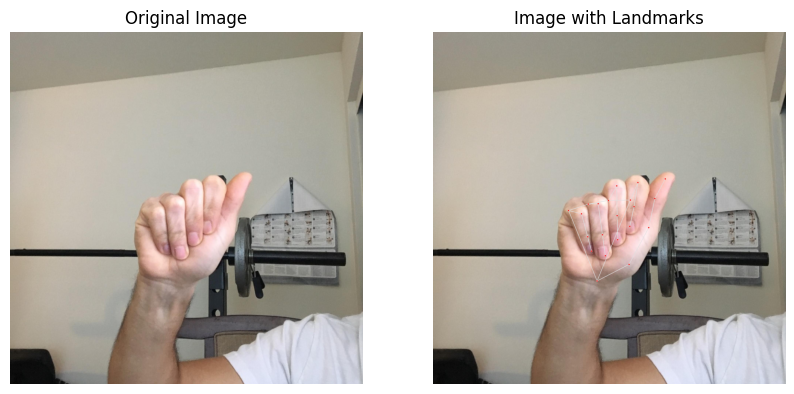

[0.4649094045162201,
 0.5552197098731995,
 0.6112443208694458,
 0.6285749077796936,
 0.6578707098960876,
 0.5593701601028442,
 0.5806146860122681,
 0.5695464611053467,
 0.5575618147850037,
 0.4972366690635681,
 0.520758330821991,
 0.5214863419532776,
 0.5230568051338196,
 0.43973299860954285,
 0.4678410589694977,
 0.48014259338378906,
 0.48834842443466187,
 0.3841070532798767,
 0.420474648475647,
 0.43846431374549866,
 0.44923800230026245,
 0.708309531211853,
 0.6613233685493469,
 0.5569894313812256,
 0.474770188331604,
 0.419055700302124,
 0.47874581813812256,
 0.4293047785758972,
 0.4974391758441925,
 0.5535166263580322,
 0.480177104473114,
 0.43875887989997864,
 0.5233886241912842,
 0.5913020372390747,
 0.4904329478740692,
 0.4892018437385559,
 0.5772323608398438,
 0.6365859508514404,
 0.5083721876144409,
 0.5179542899131775,
 0.5828750133514404,
 0.6234812140464783,
 -5.075436320112203e-07,
 -0.03012177161872387,
 -0.03712819889187813,
 -0.045234400779008865,
 -0.04707002267241478,

In [8]:
process_image('data/images/A/001.jpg', True)

# Processing All Images

In [12]:
# --- Main processing script ---
data_folder = 'data/images/*'
all_image_paths = sorted(glob(os.path.join(data_folder, '*')))

all_hand_landmarks = []
processing_error_log = []

# Using tqdm to wrap the loop and create a progress bar
for image_path in tqdm(all_image_paths, desc="Processing Images", file=sys.stdout):
    try:
        
        # Process image
        data = process_image(image_path)
        
        # Store the output data in the all_hand_landmarks list
        all_hand_landmarks.append(data)
        
    except Exception as e:
        # print(f"Error processing {image_path}: {e}")
        processing_error_log.append(f"Error processing {image_path}: {e}")

print(f"{len(processing_error_log)} Errors Detected")

Processing Images:   0%|          | 0/8442 [00:00<?, ?it/s]

Processing Images: 100%|██████████| 8442/8442 [04:46<00:00, 29.50it/s]
176 Errors Detected


# Saving Data

In [13]:
# Turning data into Pandas DataFrame
column_names = [f'x{x}' for x in range(21)] + [f'y{x}' for x in range(21)] + [f'z{x}' for x in range(21)] + ['label'] + ['path']
df = DataFrame(all_hand_landmarks, columns=column_names)

# Saving data to a parquet file named "all_hand_landmarks.parquet"
df.to_parquet("generated-data/data-extraction/all_hand_landmarks.parquet")

# Logging errors in error_log.txt
with open("generated-data/data-extraction/error_log.txt", 'w') as file:
    for errors in processing_error_log:
        file.write(errors + '\n')